Write function for following:

Given a company_name do this:

1- Get all rows of the company and sort them by Series from Share Type column.

2- Convert the Raised to Date, Post Money Valuation, Percent Shares Outstanding and Price Per Share columns to simple numbers. MM=Million,B=Billion,K=Thousand

3- With Share Type on X-Axis, plot multiple line plots with different colors, for Raised to Date, Post Money Valuation, Price Per Share, Percent Shares Outstanding

4- Plot 3 Scatter plots of (Raised to Date ,Post Money Valuation) and (Price Per Share,Post Money Valuation) and (Percent Shares Outstanding ,Post Money Valuation) and then find the 3 correlation coefficients.

5- Calculate percentage changes in Raised to Date, Post Money Valuation, Percent Shares Outstanding and Price Per Share and then plot those as multiple line plots and scatter plots like 3 and 4.

6- Now do the plots of Raised to Date, Post Money Valuation, Percent Shares Outstanding and Price Per Share over time in terms of quarters of year using Date column. Do time series interpolation like forward filling/linear interpolation for missing values.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [33]:
def convert_to_number(s):
    if isinstance(s, str):
        s = s.strip('$').replace(',', '').replace('%', '')
        if 'B' in s:
            return float(s.replace('B', '')) * 1e9
        elif 'MM' in s:
            return float(s.replace('MM', '')) * 1e6
        elif 'K' in s:
            return float(s.replace('K', '')) * 1e3
        else:
            return float(s)
    return s

In [ ]:
def analyze_company(data, company_name):
# Filter by company name
    company_data = data[data['company_name'] == company_name].copy()
    
    # Convert financial columns to numerical values
    company_data['Raised to Date'] = company_data['Raised to Date'].apply(convert_to_number)
    company_data['Post Money Valuation'] = company_data['Post Money Valuation'].apply(convert_to_number)
    company_data['Percent Shares Outstanding'] = company_data['Percent Shares Outstanding'].str.rstrip('%').astype('float') / 100
    company_data['Issue Price'] = company_data['Issue Price'].apply(convert_to_number)
    
# Sort by Share Type
    company_data.sort_values(by='Share Type', inplace=True)
    
# Line plots for financial metrics
    plt.figure(figsize=(14, 8))
    
    for column in ['Raised to Date', 'Post Money Valuation', 'Issue Price', 'Percent Shares Outstanding']:
        sns.lineplot(data=company_data, x='Share Type', y=column, label=column)
    
    plt.title(f'{company_name} Financial Metrics by Share Type')
    plt.xlabel('Share Type')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Scatter plots and correlation coefficients
    metrics = ['Raised to Date', 'Post Money Valuation', 'Issue Price', 'Percent Shares Outstanding']
    scatter_pairs = [('Raised to Date', 'Post Money Valuation'), 
                     ('Issue Price', 'Post Money Valuation'), 
                     ('Percent Shares Outstanding', 'Post Money Valuation')]
    corr_coef = {}
    
    for x, y in scatter_pairs:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=company_data, x=x, y=y)
        plt.title(f'{x} vs {y}')
        plt.show()
        corr_coef[f'{x} vs {y}'] = company_data[[x, y]].corr().iloc[0, 1]
    
    print("Correlation Coefficients:", corr_coef)

# Calculate percentage changes and plot
    company_data_pct_change = company_data[metrics].pct_change().dropna()
    plt.figure(figsize=(14, 8))
    
    for column in metrics:
        sns.lineplot(data=company_data_pct_change, x=company_data['Share Type'][1:], y=column, label=column)
    
    plt.title(f'{company_name} Percentage Change in Financial Metrics by Share Type')
    plt.xlabel('Share Type')
    plt.ylabel('Percentage Change')
    plt.legend()
    plt.show()

    for x, y in scatter_pairs:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=company_data_pct_change, x=x, y=y)
        plt.title(f'Percentage Change: {x} vs {y}')
        plt.show()
    
# Time series analysis
    company_data['Date'] = pd.to_datetime(company_data['Date'], errors='coerce')
    company_data = company_data.drop_duplicates(subset=['Date']).dropna(subset=['Date'])
    company_data.set_index('Date', inplace=True)
    
    # Resampling to quarterly frequency and interpolating missing values
    company_data = company_data.resample('Q').interpolate(method='linear').reset_index()

    plt.figure(figsize=(14, 8))
    for column in ['Raised to Date', 'Post Money Valuation', 'Issue Price', 'Percent Shares Outstanding']:
        sns.lineplot(data=company_data, x='Date', y=column, label=column)
    plt.title(f'{company_name} Financial Metrics Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


    

Enter the company name:  verbit


C:\Users\ali.mohsin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ali.mohsin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ali.mohsin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ali.mohsin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

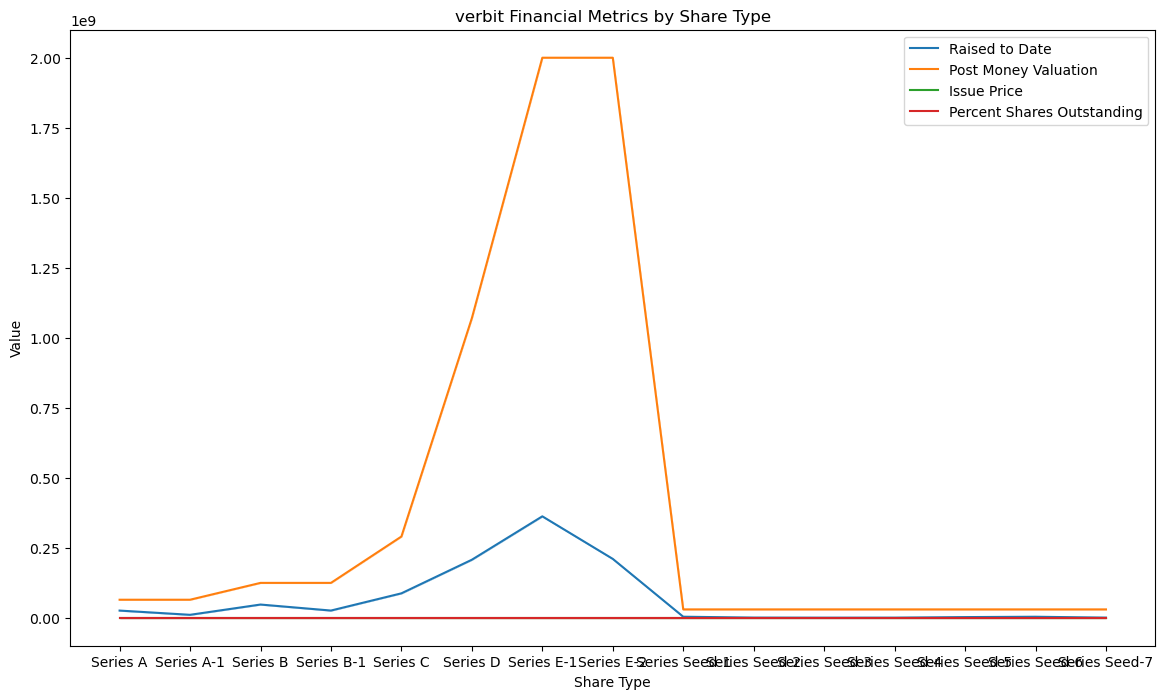

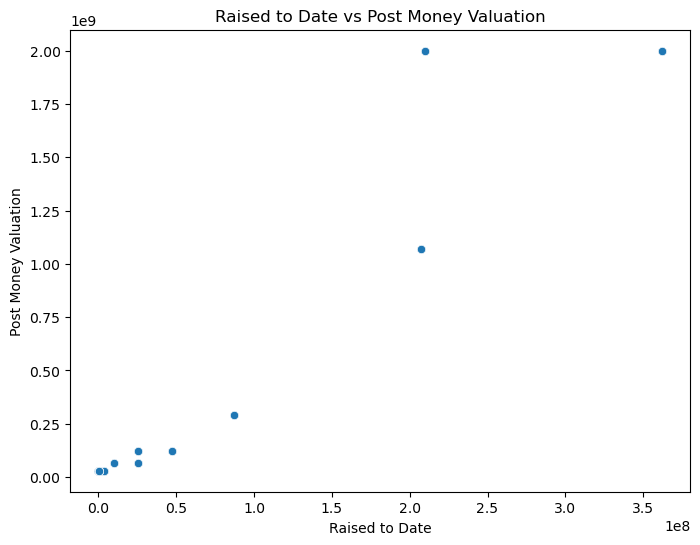

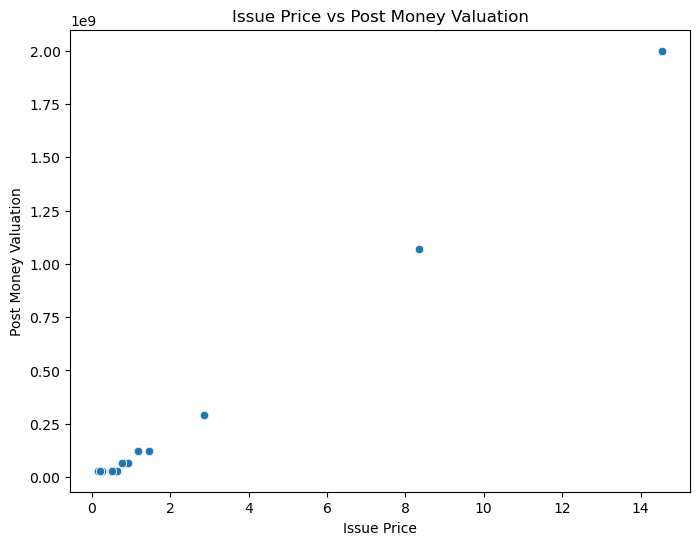

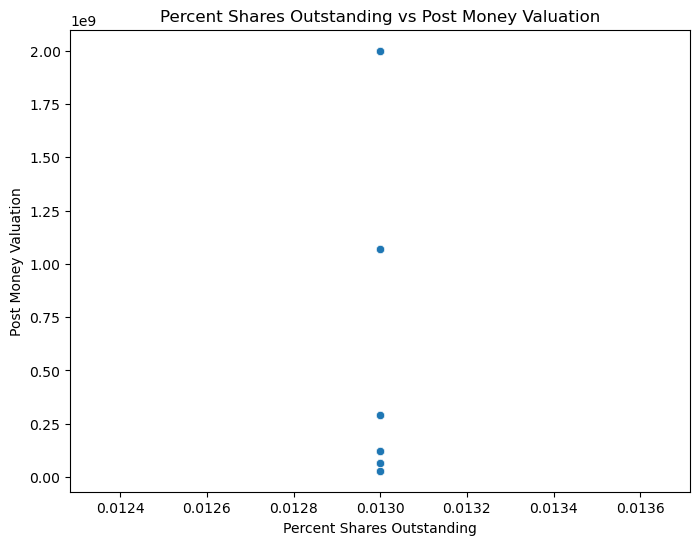

Correlation Coefficients: {'Raised to Date vs Post Money Valuation': 0.9485120473941555, 'Issue Price vs Post Money Valuation': 0.9988200225207018, 'Percent Shares Outstanding vs Post Money Valuation': nan}


C:\Users\ali.mohsin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ali.mohsin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ali.mohsin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ali.mohsin\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

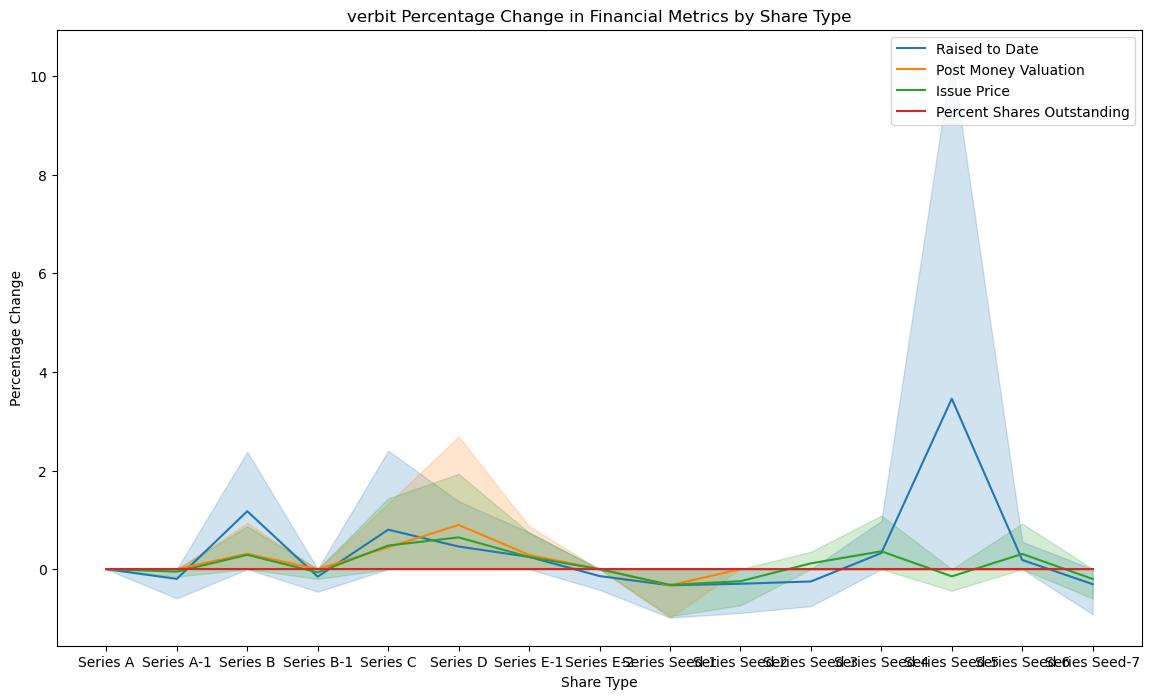

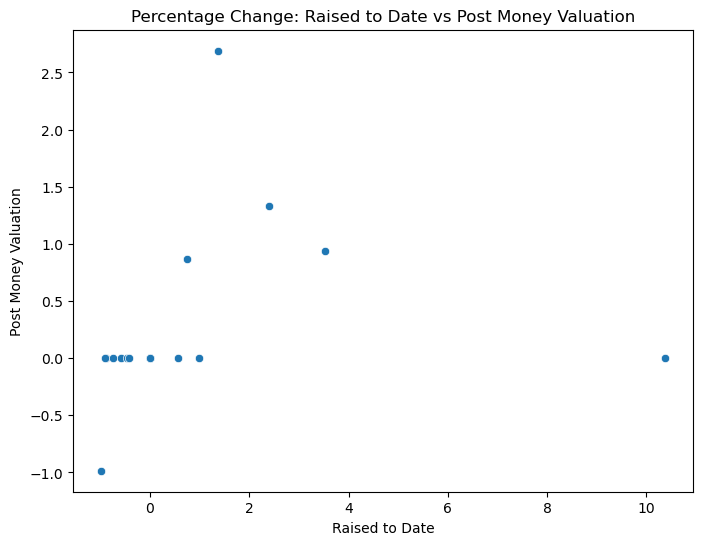

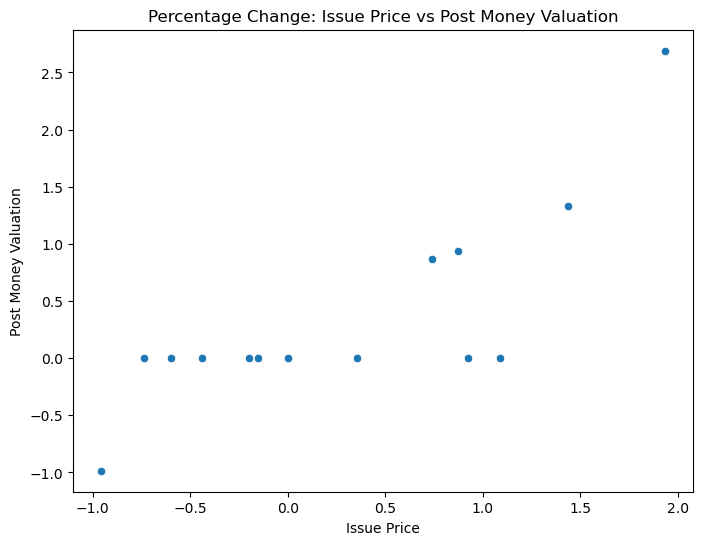

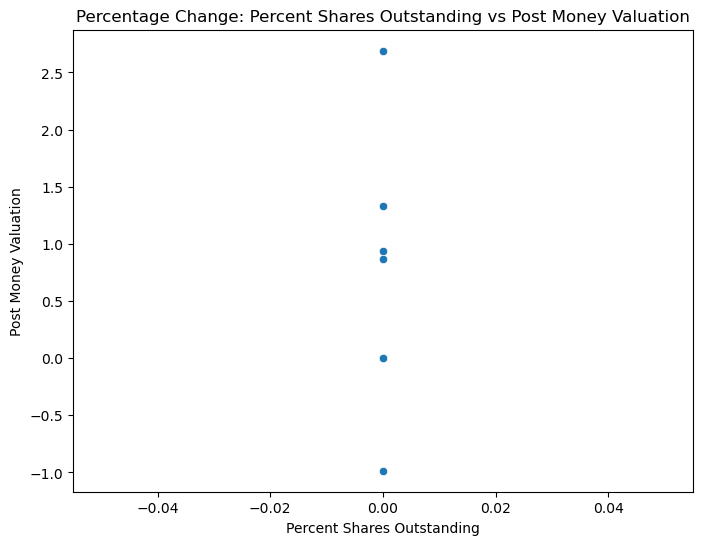

C:\Users\ali.mohsin\AppData\Local\Temp\ipykernel_12204\1712713942.py:62: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  company_data['Date'] = pd.to_datetime(company_data['Date'])


ValueError: cannot reindex on an axis with duplicate labels

In [39]:
file_path = 'datasets/valuation_data.csv'
data = pd.read_csv(file_path)

company_name = input("Enter the company name: ")
analyze_company(data, company_name)